# PROJET ML (complet)

In [1]:
   # I- Regression Linéaire :

In [2]:
#importer lesbibliothèques :

import pandas as pd #permettant la manipulation et l'analyse des données.
# Elle propose des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles.

import matplotlib.pyplot as plt #tracer et visualiser des données sous formes de graphiques.

import numpy as np #manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.

from sklearn.model_selection import train_test_split #pour diviser notre data pour training et testing
from sklearn import metrics #pour mesurer la performance des algo de classification

In [3]:
#importer la dataset:
Data = pd.read_csv("C:/Users/hp/Desktop/GI4/Bouchy IA/projet/garments_worker_productivity.csv")
Data = Data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [4]:
print(Data.shape) #nbre de lignes et colonnes

(691, 15)


In [5]:
print(Data.describe())

             team  targeted_productivity         smv           wip  \
count  691.000000             691.000000  691.000000    691.000000   
mean     6.520984               0.723980   23.245412   1190.465991   
std      3.458333               0.102006    6.976497   1837.455001   
min      1.000000               0.070000   10.050000      7.000000   
25%      4.000000               0.700000   18.790000    774.500000   
50%      6.000000               0.750000   22.520000   1039.000000   
75%     10.000000               0.800000   28.080000   1252.500000   
max     12.000000               0.800000   54.560000  23122.000000   

          over_time   incentive   idle_time    idle_men  no_of_style_change  \
count    691.000000  691.000000  691.000000  691.000000          691.000000   
mean    6508.205499   44.483357    1.264834    0.639653            0.260492   
std     2864.505604   27.596591   16.712923    4.283652            0.537185   
min        0.000000    0.000000    0.000000    0.0000

In [6]:
# y c'est notre output, la valeur qu'on va predicter
y = Data['actual_productivity']

# x (input) les valeurs de l'entrée
x = Data.drop(['date', 'quarter', 'department', 'day', 'actual_productivity'], axis = 'columns')
x.shape

(691, 10)

In [7]:
#importer l'algo de la regression linéaire depuis la bibliothèque sklearn
from sklearn.linear_model import LinearRegression

In [8]:
#splicing data (80% training and 20% testing data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

In [9]:
# la variable lr_model est notre LR modèle
lr_model = LinearRegression()

In [10]:
# Training the algorithm
lr_model.fit(x_train, y_train)

LinearRegression()

In [11]:
# prédicter des valeurs en utilisant x_test comme entrée
y_pred = lr_model.predict(x_test)

In [12]:
#comparaison de y_test et y_pred
df = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_pred.flatten()})
print(df)

       Actual  Predicted
0    0.800319   0.784100
1    0.600240   0.589254
2    0.499980   0.527354
3    0.303574   0.321791
4    0.700279   0.784164
..        ...        ...
134  0.600983   0.371636
135  0.650224   0.653724
136  0.800435   0.852535
137  0.700888   0.677408
138  0.705577   0.748004

[139 rows x 2 columns]


<AxesSubplot:>

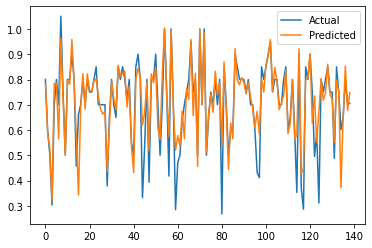

In [13]:
df.plot() #schema montrant la difference entre le vrai résultat et nos prédictions 

<AxesSubplot:>

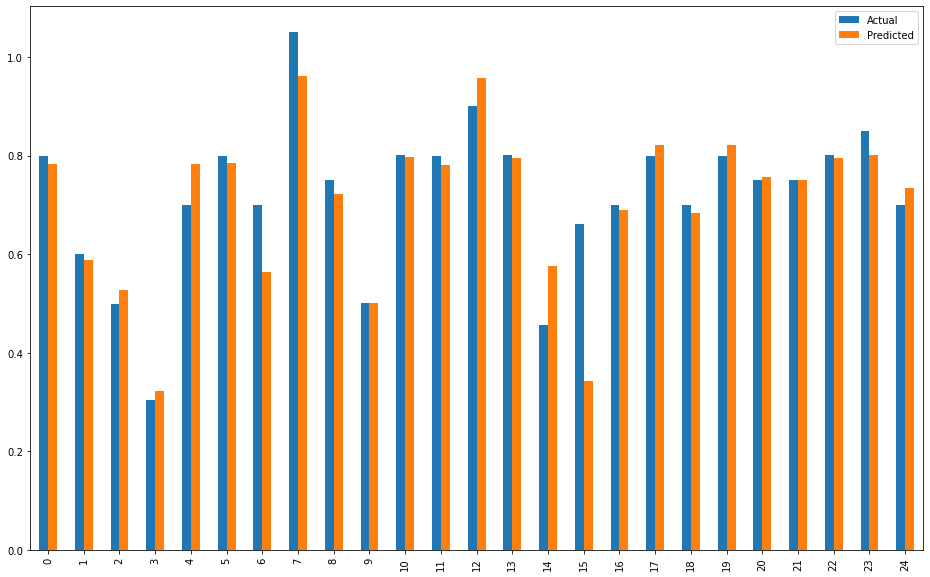

In [14]:
df1 = df.head(25)
df1.plot(kind = 'bar', figsize = (16, 10))

In [15]:
#l'erreur
print('MEAN_ABSOLUTE_ERROR :', metrics.mean_absolute_error(y_test, y_pred))
print('MEAN_SQUARED_ERROR :', metrics.mean_squared_error(y_test, y_pred))
print('ROOT_MEAN_SQUARED_ERROR :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#accuracy
print('accuracy :', lr_model.score(x_test, y_pred))

MEAN_ABSOLUTE_ERROR : 0.050729946228732774
MEAN_SQUARED_ERROR : 0.007220328153924519
ROOT_MEAN_SQUARED_ERROR : 0.08497251410853111
accuracy : 1.0


In [16]:
#Importer la Dataset avec la nouvelle colonne class
data = pd.read_csv("C:/Users/hp/Desktop/GI4/Bouchy IA/projet/garments_worker_productivity (2).csv")
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

print("data shape : ", data.shape)
print("\n")
print(Data.describe())

data shape :  (691, 16)


             team  targeted_productivity         smv           wip  \
count  691.000000             691.000000  691.000000    691.000000   
mean     6.520984               0.723980   23.245412   1190.465991   
std      3.458333               0.102006    6.976497   1837.455001   
min      1.000000               0.070000   10.050000      7.000000   
25%      4.000000               0.700000   18.790000    774.500000   
50%      6.000000               0.750000   22.520000   1039.000000   
75%     10.000000               0.800000   28.080000   1252.500000   
max     12.000000               0.800000   54.560000  23122.000000   

          over_time   incentive   idle_time    idle_men  no_of_style_change  \
count    691.000000  691.000000  691.000000  691.000000          691.000000   
mean    6508.205499   44.483357    1.264834    0.639653            0.260492   
std     2864.505604   27.596591   16.712923    4.283652            0.537185   
min        0.000000    0.00

In [17]:
#séparer les variables dépendantes et indépendantes
y = data['class'] #output or label
X = data.drop(['date', 'quarter', 'department', 'day', 'class'], axis = 'columns') #input 

In [18]:
# séparer les data pour training et testing
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

In [19]:
# Mise à l'échelle des var
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
              # 1- Random Forest Algorithm

In [21]:
from sklearn.ensemble import RandomForestRegressor #notre algo

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#notre model 
regressor = RandomForestRegressor()

#hyperparameters : 
# nombre des arbres dans random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]
# nombre des features pour chaque split
max_features = ['auto', 'sqrt']
# le nombre max des niveaux dans l'arbre
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# nombre min de samples pour diviser un noeud
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# créer random grid (contient les hyper_parametres)
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rg = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [22]:
rg.fit(X_train, y_train)

rg.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

     Actual  Predicted
0         1        1.0
1         0        0.0
2         0        0.0
3         0        0.0
4         0        0.0
..      ...        ...
134       0        0.0
135       0        0.0
136       1        1.0
137       0        0.0
138       0        0.0

[139 rows x 2 columns]


1.0

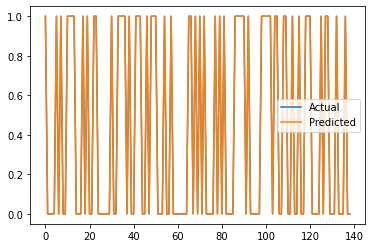

In [99]:
#tester en utilisant X_test
y_pred = rg.predict(X_test)

#comparaison de y_test et y_pred
df = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_pred.flatten()})
print(df)

df.plot()

rg.score(X_test, y_test) #the accuracy

In [24]:
               # 2- Logistic regression Algorithm 

In [71]:
from sklearn.linear_model import LogisticRegression #notre algo

logreg = LogisticRegression() #model logreg

#hyperparameters
C = np.linspace(1, 200)
penalty = ['l1', 'l2']
hyperparameters = dict(C = C, penalty = penalty)

lr = RandomizedSearchCV(logreg, hyperparameters, n_iter = 100, cv = 5, random_state = 41)
lr.fit(X_train, y_train)
lr.best_params_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. Th

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. Th

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. Th

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. Th

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. Th

{'penalty': 'l2', 'C': 61.91836734693878}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
134       0          0
135       0          0
136       1          1
137       0          0
138       0          0

[139 rows x 2 columns]


1.0

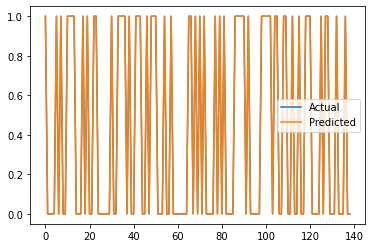

In [98]:
#tester en utilisant X_test
y_pred = lr.predict(X_test)

#comparaison de y_test et y_pred
df = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_pred.flatten()})
print(df)

df.plot()

rg.score(X_test, y_test) #the accuracy

In [27]:
                # 3- K Nearest Neighbors Algorithm (KNN)

In [73]:
#importer l'algo
from sklearn.neighbors import KNeighborsClassifier

In [74]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50,10))
n_neighbors = list(range(1,30,5))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
kn = GridSearchCV(knn, hyperparameters, cv = 5)

#Fit the model
kn.fit(X_train, y_train)

kn.best_params_

#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
134       0          0
135       0          0
136       1          1
137       0          0
138       0          1

[139 rows x 2 columns]


0.9712230215827338

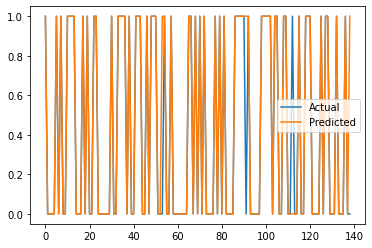

In [97]:
#tester en utilisant X_test
y_pred = kn.predict(X_test)

#comparaison de y_test et y_pred
df = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_pred.flatten()})
print(df)

df.plot()

kn.score(X_test, y_test) #the accuracy

In [76]:
                # 4- Gradient Boosting Classifier

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gbc = GradientBoostingClassifier()

#Hyperparameters
parameters = {
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1,10]
}

gbb = RandomizedSearchCV(gbc, parameters, n_iter = 100, cv = 5)

gbb.fit(X_train, y_train)

gbb.best_params_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
134       0          0
135       0          0
136       1          1
137       0          0
138       0          0

[139 rows x 2 columns]


1.0

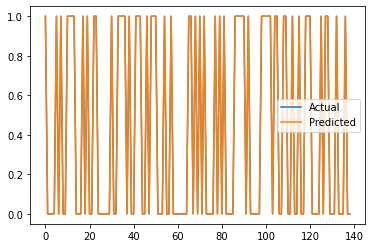

In [86]:
#tester en utilisant X_test
y_pred = gbb.predict(X_test)

#comparaison de y_test et y_pred
df = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_pred.flatten()})
print(df)

df.plot()

gbb.score(X_test, y_test) #the accuracy



In [80]:
                 # 5- Decision tree

In [87]:
from sklearn.tree import DecisionTreeClassifier #notre algo depuis sklearn

dtc = DecisionTreeClassifier() 

param_dict = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : range(1, 10),
    "min_samples_split" : range(1, 10),
    "min_samples_leaf" : range(1, 5)
}

dttc = GridSearchCV(dtc, param_grid = param_dict, cv = 5, verbose = 1, n_jobs = -1)

dttc.fit(X_train, y_train)

dttc.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3074 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:    3.0s finished


{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
134       0          0
135       0          0
136       1          1
137       0          0
138       0          0

[139 rows x 2 columns]


1.0

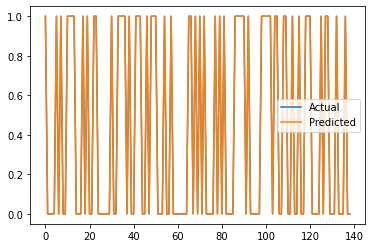

In [89]:
#tester en utilisant X_test
y_pred = dttc.predict(X_test)

#comparaison de y_test et y_pred
df = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_pred.flatten()})
print(df)

df.plot()

dttc.score(X_test, y_test) #the accuracy

In [90]:
                # 6- Naive Bayes Algorithm

In [91]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb = GridSearchCV(gnb, param_grid = parameters, cv=5, verbose=True)

#Fit the model
nb.fit(X_train, y_train)

nb.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.7s finished


{'var_smoothing': 0.1873817422860384}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          1
..      ...        ...
134       0          0
135       0          0
136       1          1
137       0          0
138       0          1

[139 rows x 2 columns]


0.8345323741007195

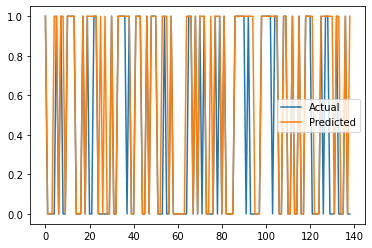

In [92]:
#tester en utilisant X_test
y_pred = nb.predict(X_test)

#comparaison de y_test et y_pred
df = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_pred.flatten()})
print(df)

df.plot()

nb.score(X_test, y_test) #the accuracy

In [93]:
               #  7- Support Vector Machine Classifier

In [94]:
from sklearn.svm import SVC #notre algo svc 

svm = SVC()#notre model dans la var svm

param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']
             }

svvm = GridSearchCV(svm, param_grid, refit=True, cv = 5, verbose=2)

svvm.fit(X_train,y_train)

svvm.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] 

[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    3.3s finished


{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
134       0          0
135       0          0
136       1          1
137       0          0
138       0          0

[139 rows x 2 columns]


1.0

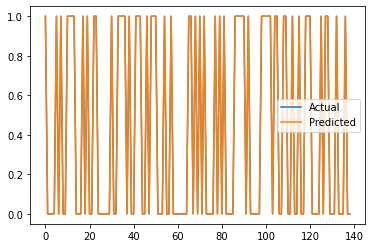

In [95]:
#tester en utilisant X_test
y_pred = svvm.predict(X_test)

#comparaison de y_test et y_pred
df = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_pred.flatten()})
print(df)

df.plot()

svvm.score(X_test, y_test) #the accuracy